In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('HIGGS_smaller.csv')

df_sample = df.sample(frac=0.8, random_state=42)

y = df_sample.iloc[:,0].to_numpy()
X = df_sample.iloc[:,1:].to_numpy()

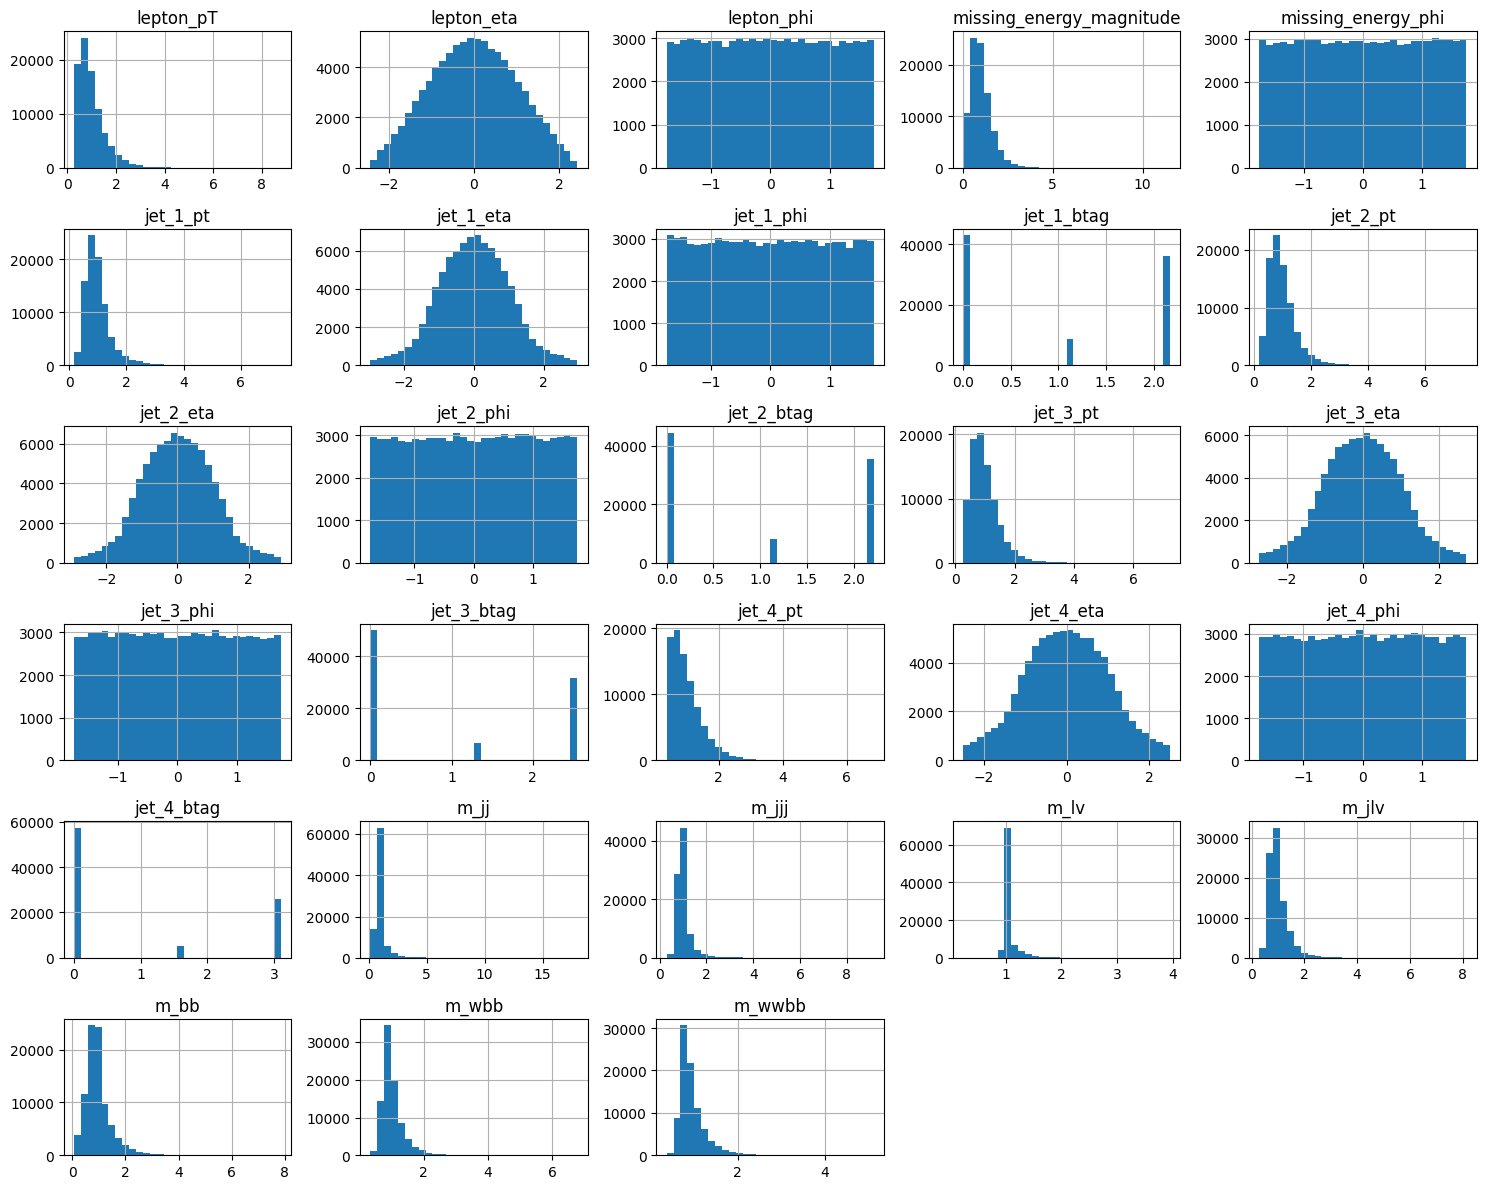

In [74]:
def add_column_names(X):
    column_names = [
        'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
        'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_btag',
        'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_btag',
        'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_btag',
        'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_btag',
        'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
    ]
    
    # Create a DataFrame and assign the column names
    X_df = pd.DataFrame(X, columns=column_names)
    return X_df

# Example usage
X_df = add_column_names(X)

# Now you can visualize histograms with column names attached
X_df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


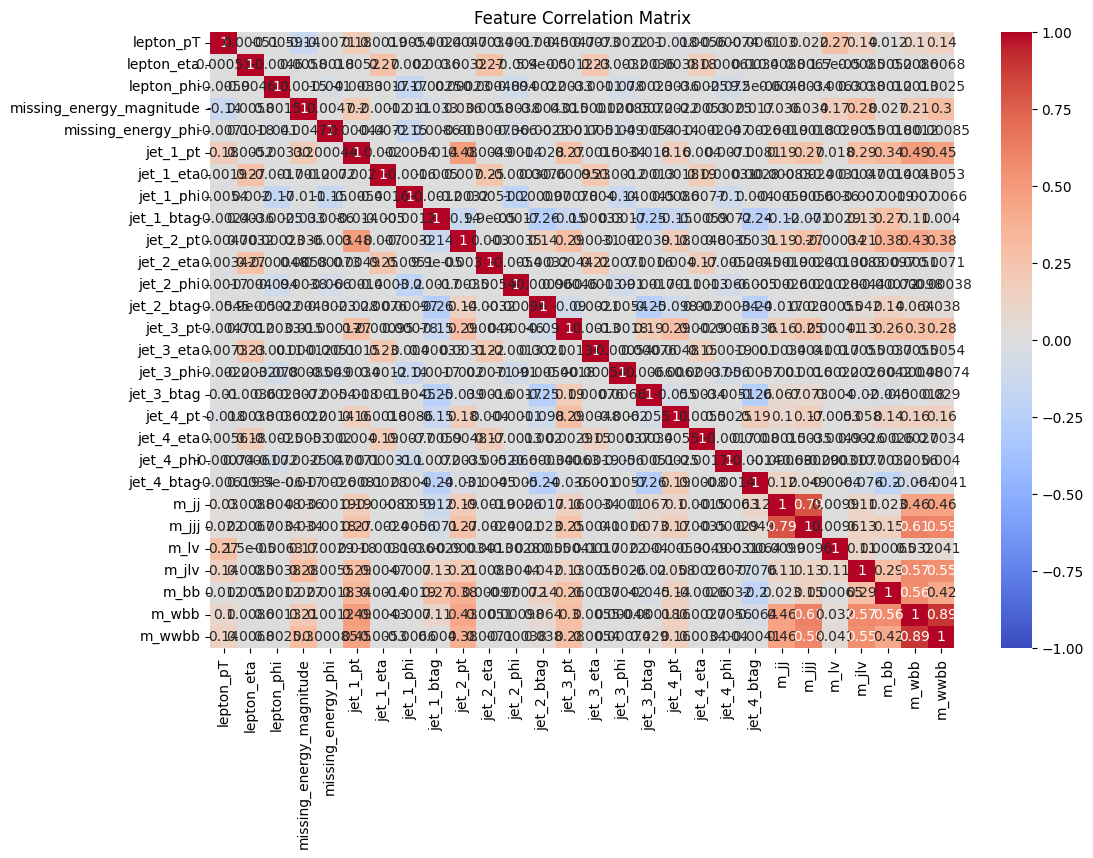

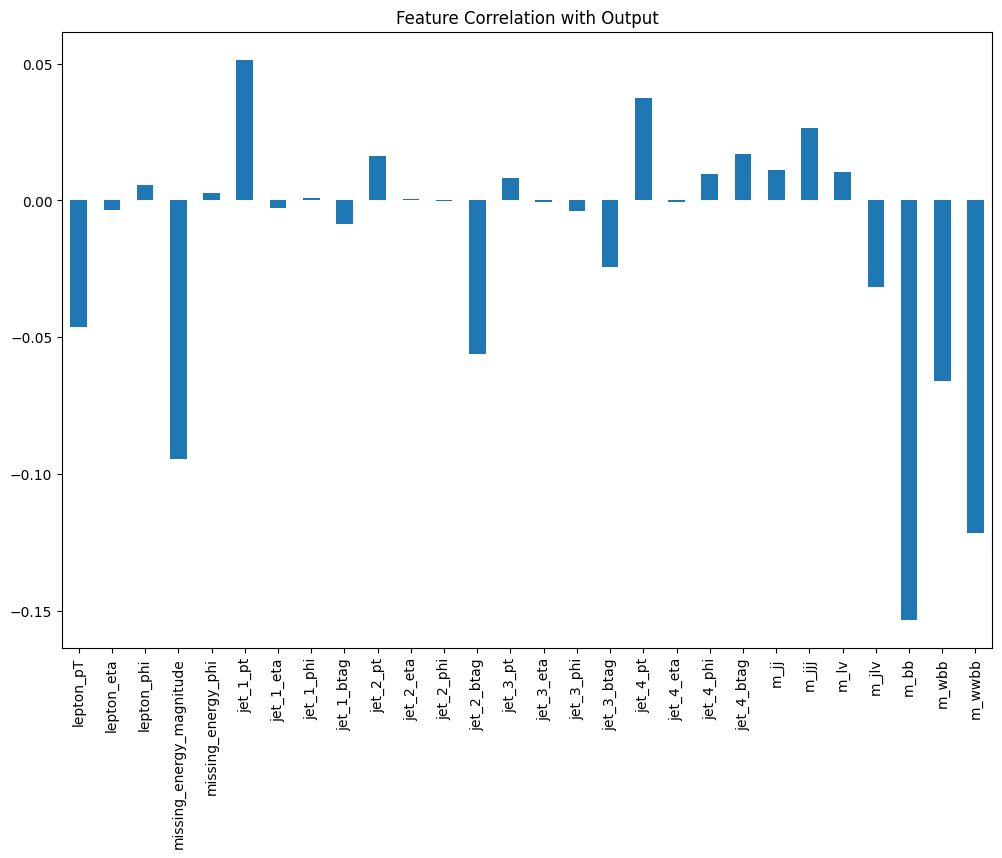

In [75]:
# Compute correlation matrix
corr_matrix = X_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

# see correlation of features with output
corr_with_output = X_df.corrwith(pd.Series(y))

plt.figure(figsize=(12, 8))
corr_with_output.plot(kind='bar')
plt.title("Feature Correlation with Output")
plt.show()



C:\Users\Nived Shah\AppData\Local\Temp\ipykernel_17808\4068955600.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr_with_output[i]) < 0.01:


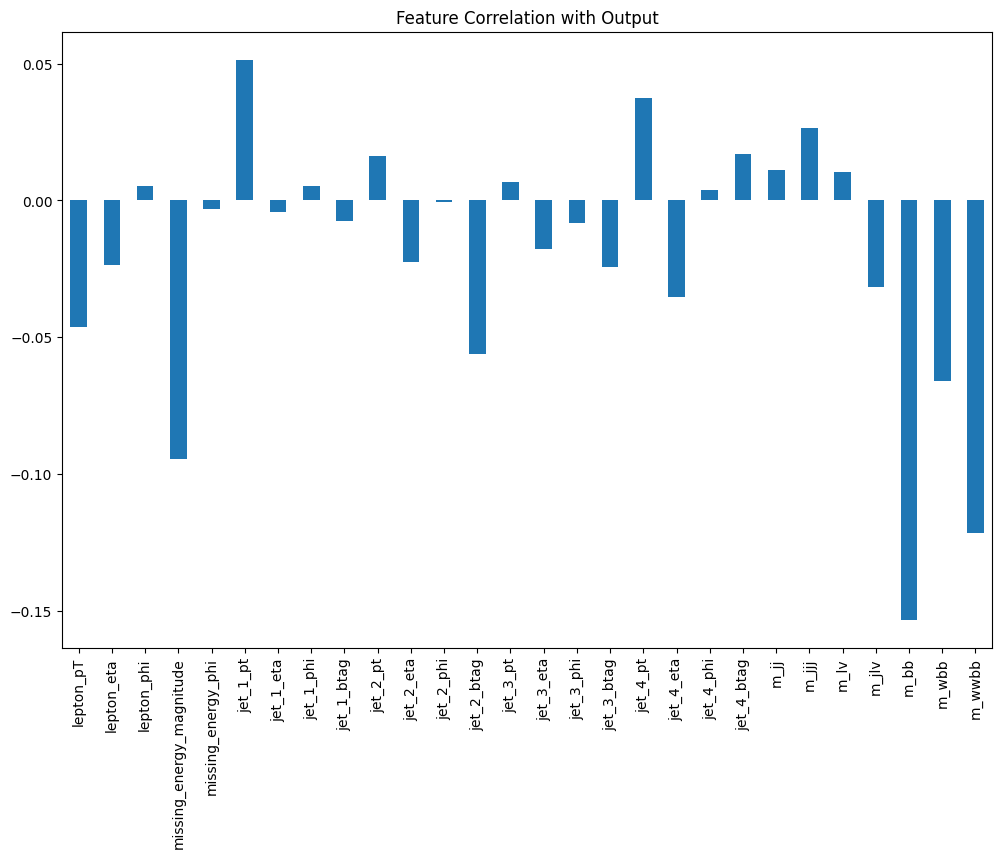

In [76]:
# square the features having correlation < 0.1 with output
for i in range(len(corr_with_output)):
    if abs(corr_with_output[i]) < 0.01:
        X_df.iloc[:,i] = X_df.iloc[:,i] ** 2

# plot correlation again with output
corr_with_output = X_df.corrwith(pd.Series(y))

plt.figure(figsize=(12, 8))
corr_with_output.plot(kind='bar')
plt.title("Feature Correlation with Output")
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X_df.copy()

for column in X_scaled.columns:
    if X_scaled[column].min() > 0:
        X_scaled[column] = X_scaled[column] / X_scaled[column].mean()
    else:
        X_scaled[column] = scaler.fit_transform(X_scaled[column].values.reshape(-1, 1))

X_df = X_scaled.copy()

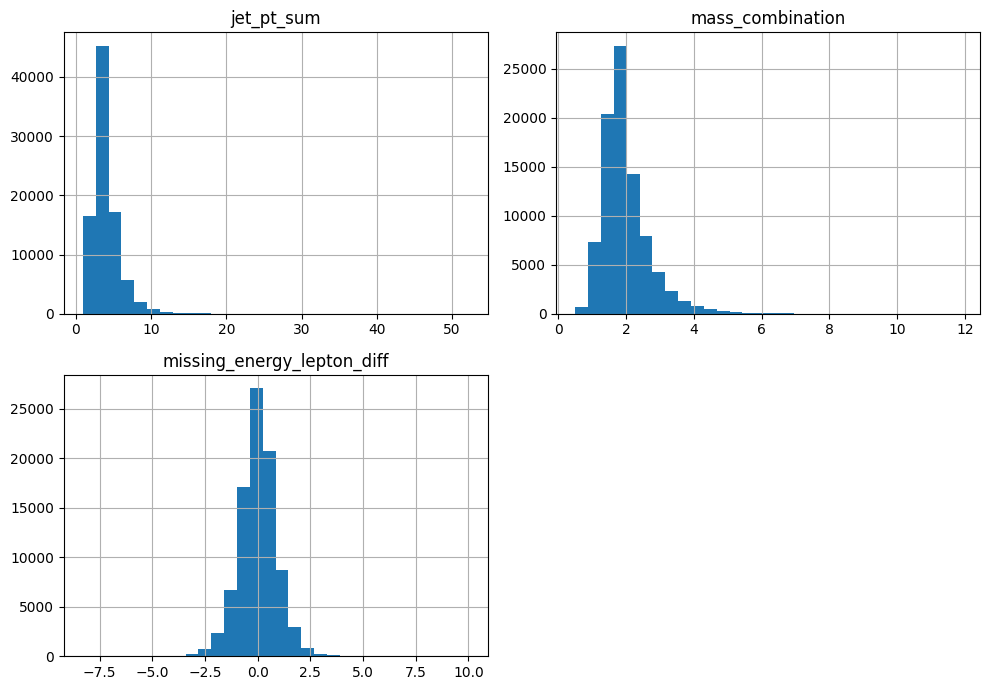

In [78]:
# Create new features based on domain knowledge
X_df['jet_pt_sum'] = X_df['jet_1_pt'] + X_df['jet_2_pt'] + X_df['jet_3_pt'] + X_df['jet_4_pt']
X_df['mass_combination'] = X_df['m_bb'] + X_df['m_wwbb']  # Combine masses of interest
X_df['missing_energy_lepton_diff'] = X_df['missing_energy_magnitude'] - X_df['lepton_pT']  # Example difference

# Now visualize the distribution of these new features
X_df[['jet_pt_sum', 'mass_combination', 'missing_energy_lepton_diff']].hist(figsize=(10, 7), bins=30)
plt.tight_layout()
plt.show()

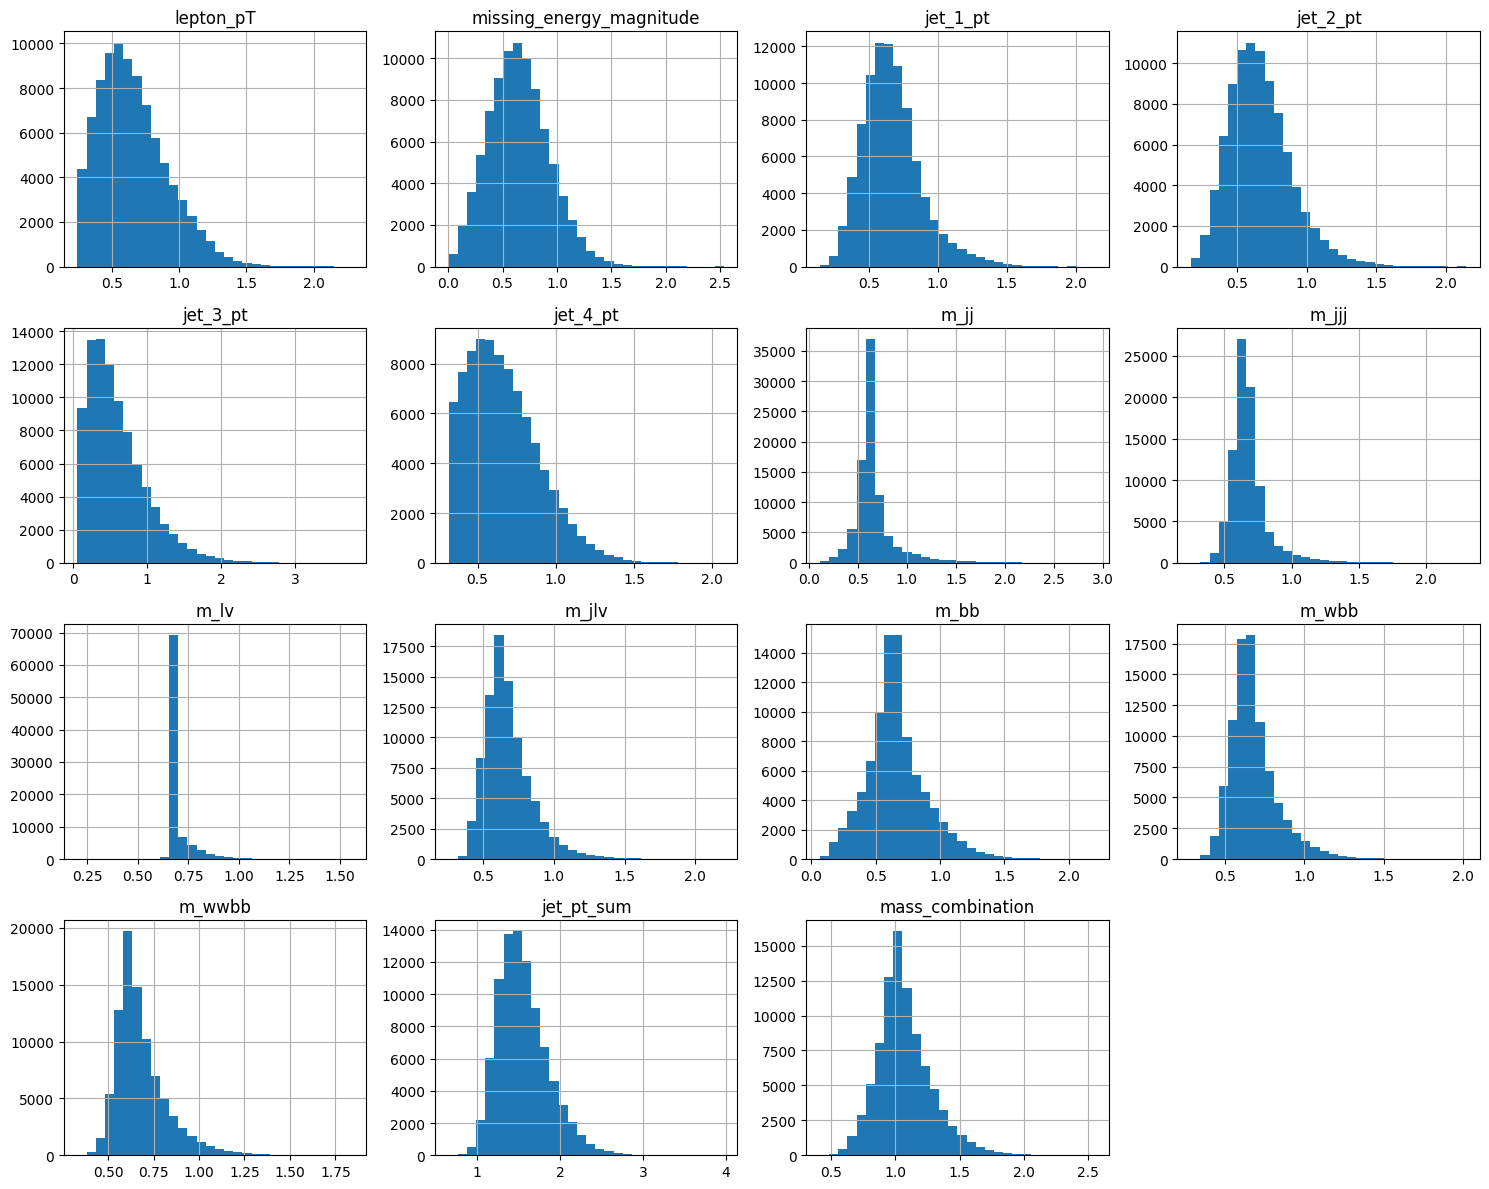

In [79]:
# apply log transformation to some selected features
features_to_transform = ['lepton_pT', 'missing_energy_magnitude', 'jet_1_pt', 'jet_2_pt', 'jet_3_pt', 'jet_4_pt', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb', 'jet_pt_sum', 'mass_combination']
X_df[features_to_transform] = X_df[features_to_transform].apply(np.log1p)

# Now visualize the distribution of these new features
X_df[features_to_transform].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


In [80]:
X_df.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,jet_pt_sum,mass_combination,missing_energy_lepton_diff
0,0.840579,0.709608,1.430751,1.043837,2.714884,0.787803,1.058374,1.479567e-01,1.181555,0.441124,...,0.317511,0.838482,0.657867,0.940915,0.746895,0.936643,1.008422,1.495793,1.348517,0.522385
1,0.784596,0.087976,1.230895,0.923492,2.838191,1.130089,4.997226,3.327826e-09,-0.915587,1.217038,...,1.010116,0.701155,0.695710,0.769227,0.404956,0.649231,0.641188,1.949478,0.874623,0.326549
2,0.397676,0.350568,0.027515,0.671443,2.186326,0.475808,1.242729,1.987995e+00,-0.915587,0.493903,...,0.920479,0.671686,0.662964,0.599107,0.238190,0.510723,0.528466,1.146019,0.675634,0.468698
3,1.082286,1.601165,0.089469,0.955019,1.905979,0.370274,2.069172,4.651499e-01,1.181555,0.454582,...,0.536751,0.559108,1.075001,0.789276,0.571545,0.597664,0.609645,1.292555,0.959648,-0.352699
4,1.125349,0.221253,0.000153,0.844826,0.066955,1.412570,0.592253,2.599092e+00,1.181555,0.951079,...,1.062734,0.775176,0.657217,1.270490,1.267882,1.015678,0.986961,2.072223,1.655632,-0.753719


In [81]:
# X_df_dropped = X_df.drop(columns=['jet_1_pt', 'jet_2_pt', 'jet_3_pt', 'jet_4_pt', 'm_bb', 'm_wwbb', 'missing_energy_magnitude', 'lepton_pT'])

# X_df = X_df_dropped

# X_df.shape

In [82]:
# perform selectKbest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(X_df, y)

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print(X_train.shape)

(70400, 15)


In [85]:
# SVM with Linear Kernel
svm_model = SVC(kernel='linear', probability=True)

In [86]:
# Perform cross-validation to evaluate the SVM model
# from sklearn.model_selection import StratifiedShuffleSplit

# stratified_split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
# cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=stratified_split, n_jobs=-1)

from sklearn.linear_model import SGDClassifier

svm_model = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', max_iter=1000, random_state=42))
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=3)

print(f'Cross-Validation Accuracy: {np.mean(cross_val_scores):.2f} ± {np.std(cross_val_scores):.2f}')

Cross-Validation Accuracy: 0.63 ± 0.01


In [87]:
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.64
Precision: 0.62
Recall: 0.78
F1 Score: 0.69
ROC AUC Score: 0.63
